# Dog Breed Classification (Tensor flow 2.0)

## 1. Problem

Identify the breed

## 2. Data

from Kaggle

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

For each image in the test set, you must predict a probability for each of the different breeds.
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

* The dataset comprises 120 breeds of dogs (120 classes). (images: unstructured data)

* around 10,000+ images the trainig set
* around 10,000+ images in the test set (no label)


In [0]:
import pandas as pd
import numpy as np

In [0]:
# !unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

tf.constant(dfdfghfgfg 

1.   List item

1.   List item
2.   List item


2.   List item

frfrfrฏโธDFDFDFRFRRFRFR)### Get our workspace ready

In [361]:
import tensorflow as tf
print("TF version:", tf.__version__)

TF version: 2.2.0


In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [363]:
print(tf.__version__)

2.2.0


### Ready
* import tensorflow 2.x
* import tensorflow hub - collect data
* use GPU 

# New Section

In [364]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__)
print(hub.__version__)

# Check GPU availability
print("GPU", "available!! :D" if tf.config.list_physical_devices("GPU") else "not available :(")

2.2.0
0.8.0
GPU available!! :D


In [365]:
# Checkout the labels
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     d3b93c2ca76232e541a73083f6f04332  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [366]:
labels_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [367]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,d3b93c2ca76232e541a73083f6f04332,scottish_deerhound
freq,1,126


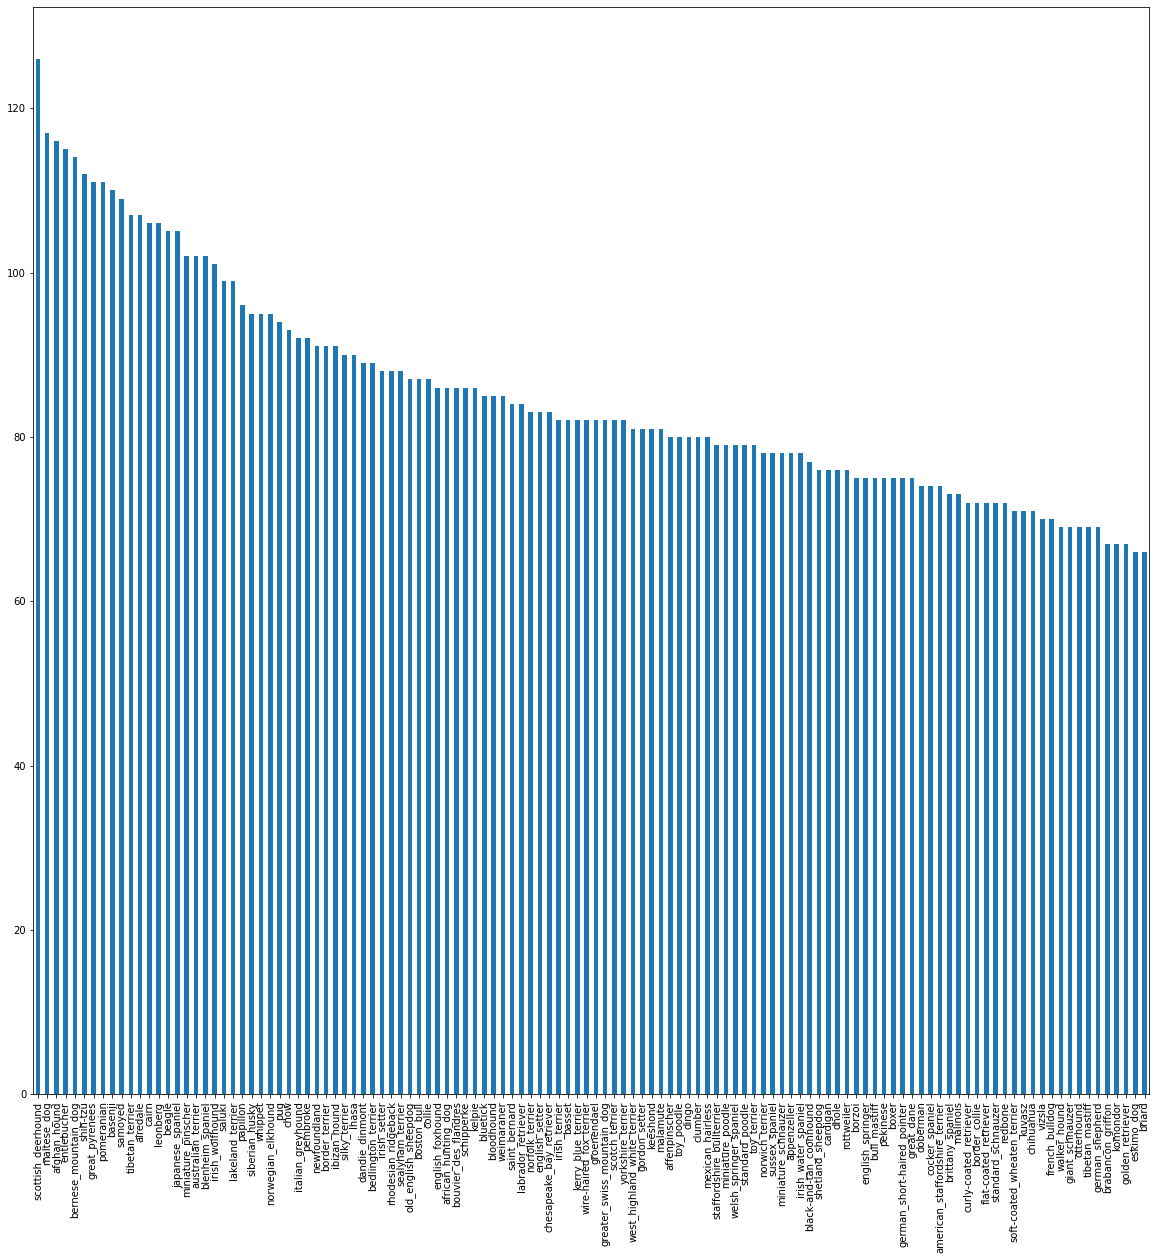

In [368]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,20))

In [0]:
from IPython.display import Image

In [370]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [371]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
komondor                 67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [372]:
len(labels_csv[labels_csv["breed"]=="scottish_deerhound"])

126

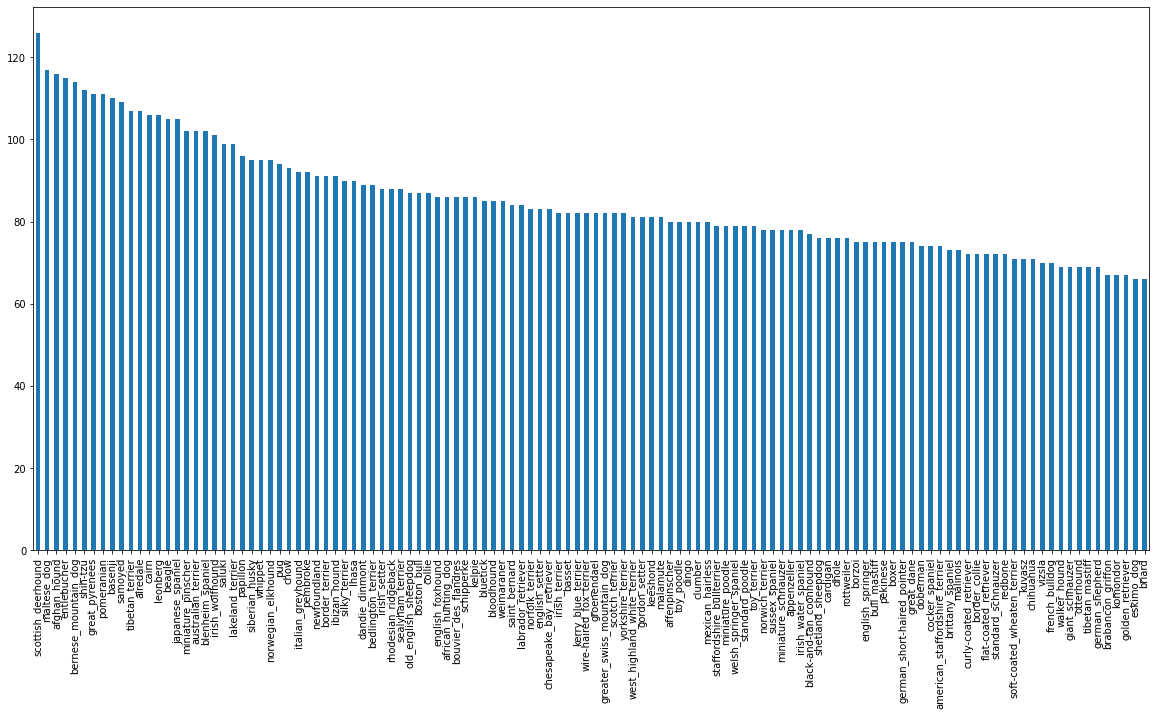

In [373]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [374]:
labels_csv["breed"].value_counts().median()

82.0

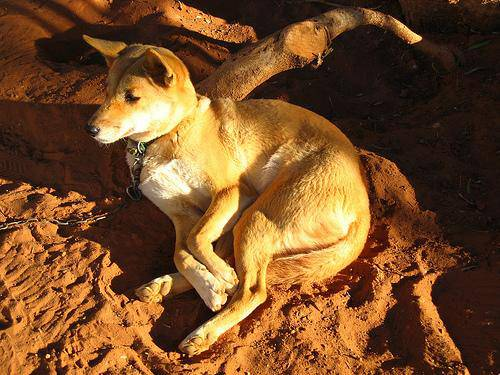

In [375]:
from IPython.display import Image
Image("drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")


### Getting images and their labels

# New Section

In [376]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
# Create pathname from image ID's
filenames = ["drive/My Drive/Dog Vision/train/"+ fname + ".jpg" for fname in labels_csv["id"]]

In [378]:
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [379]:
import os
os.listdir("drive/My Drive/Dog Vision/train")[:10]

['ec1f2e671f8b4531b203642664173ffd.jpg',
 'eab1276af0a54dfdf9d0311916ea813d.jpg',
 'f3c31d575505827557a5fe80f7bba070.jpg',
 'ebc378abeb610e6d4f2a8ad0d731ccfb.jpg',
 'f41a4709ea45d334e7fd4f61f4ca01c0.jpg',
 'ecb279d5c137b233683c6e0b8d7c1b88.jpg',
 'f430cdcc2b98a6e3566e71b27ae60e71.jpg',
 'f1842cfc3bdbf485847574cb1b133d29.jpg',
 'ef91df1385e44b81c78dd345b1a17f14.jpg',
 'eaadc51c7c1a507fb380909113036428.jpg']

In [380]:
# check whether number of filenames matches number of actual image files
import os

# list files in directory
if len(os.listdir("drive/My Drive/Dog Vision/train/")) == len(filenames):
  print("Filenames match actaul of files! Proceed.")
else:
  print("Filenames do ont match actual amount of files, check the target directory")

Filenames match actaul of files! Proceed.


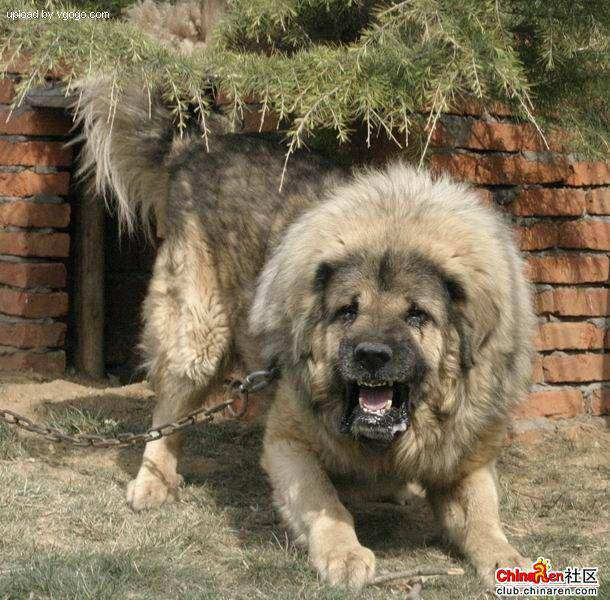

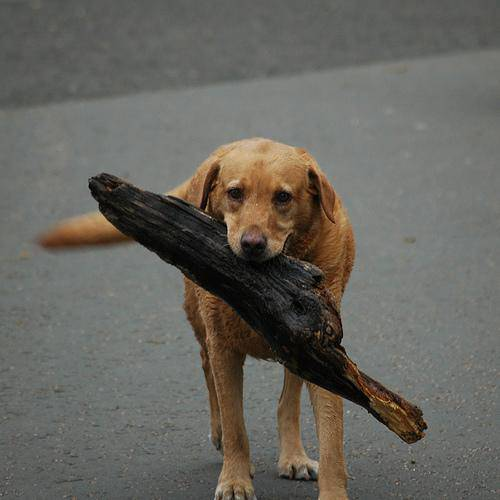

In [381]:
# One more check
display(Image(filenames[9000]))
display(Image("drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg"))

In [382]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [383]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [0]:
# import numpy as np
# labels = labels_csv["breed"].to_numpy
# # labels = np.array(labels) # does same thing
# labels

In [385]:
len(labels)

10222

In [386]:
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Nimber of labels does not match number of filesnames, check data directories")

Number of labels matches number of filenames!


In [387]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [388]:
len(unique_breeds)

120

In [389]:
# turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [390]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [391]:
len(boolean_labels)

10222

In [392]:
# Eample: Turninig boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [393]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [394]:
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [395]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [396]:
len(boolean_labels)

10222

In [397]:
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [398]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [399]:
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [0]:
X = filenames
y = boolean_labels

In [0]:
NUM_IMAGES = 1000 #@param {type: "slider", min:1000, max:10000, step:1000}

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

In [404]:
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [405]:
X_train[:5], y_train[:2]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

In [406]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [407]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [0]:

IMG_SIZE=224

def process_image (image_path):
  image = tf.io.read_file(image_path) # in string type 
  image = tf.image.decode_jpeg(image, channels=3) # decode jpg file into numeric format
  image = tf.image.convert_image_dtype(image,tf.float32) # convert and scale in range 0-1
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE]) # resize iamge to the same size
  return image

In [0]:
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [0]:

# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    # Create tensor dataset
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    # Map function and turn them into batches
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [411]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [412]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [413]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [414]:
train_data.element_spec, val_data.element_spec
# First row (None) is refer to batch size. It's specified with None for flexibility

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [0]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

In [0]:
# next(train_data.as_numpy_iterator())[:2]

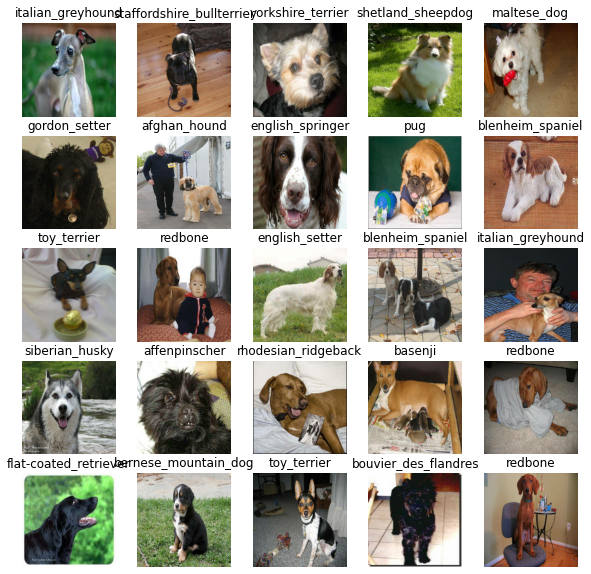

In [417]:

# Visualize training images from the training data batch (shuffle every time)
train_images, train_labels = next(train_data.as_numpy_iterator()) # turn batch dataset into iterator and return the next one
show_25_images(train_images, train_labels)

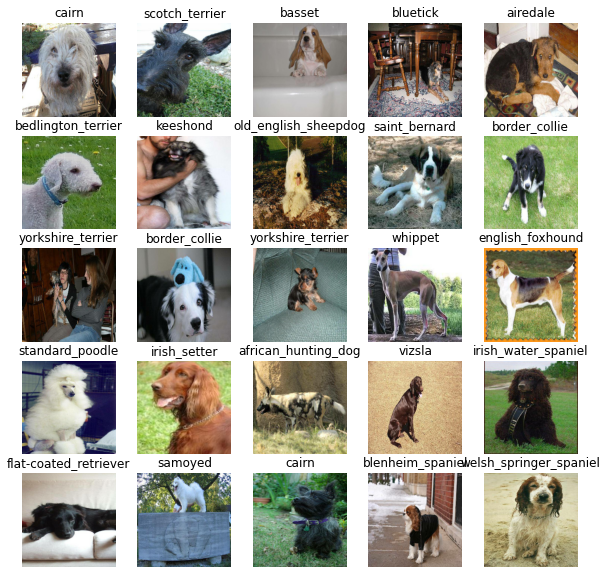

In [418]:
# validation data - not shuffle
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [0]:

# # Setup input shape to the model
# INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# # Setup output shape of the model
# OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# # Setup model URL from TensorFlow Hub
# MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [0]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [0]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  model = tf.keras.Sequential([
                               hub.KerasLayer(MODEL_URL),
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                     activation="softmax")
  ])

  model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
  )

  model.build(INPUT_SHAPE)

  return model

In [422]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_6 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [423]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
import datetime

def create_tensorboard_callback():
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [0]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [0]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10,max:100,step:10}

In [427]:
print("gpu","available" if tf.config.list_physical_devices("GPU") else "not available")

gpu available


In [0]:
def train_model():
  """
  Train a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytimr we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  
  return model

In [0]:
# model = train_model()

In [0]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [431]:
model = load_model('drive/My Drive/Dog Vision/models/20200602-08321591086764-1000-images-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20200602-08321591086764-1000-images-Adam.h5


In [432]:
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 124ms/step


array([[1.2743007e-03, 1.3116124e-04, 1.0285289e-03, ..., 5.8747339e-04,
        1.5861589e-05, 5.1313289e-03],
       [3.7158786e-03, 2.9801311e-05, 2.7748025e-03, ..., 1.2003043e-03,
        4.1776029e-03, 4.9617363e-05],
       [9.4469863e-07, 2.8928698e-05, 8.7873894e-05, ..., 3.9409363e-04,
        5.1020594e-05, 1.6550547e-04],
       ...,
       [2.1401085e-05, 1.3388199e-04, 1.0089715e-04, ..., 3.4627872e-05,
        1.2053327e-04, 1.8877702e-04],
       [2.4331058e-03, 9.4412360e-05, 4.7048761e-05, ..., 6.1008614e-05,
        2.0663576e-05, 3.1862096e-03],
       [2.9042180e-04, 4.5536395e-05, 5.1352722e-03, ..., 3.0663889e-03,
        4.6204557e-04, 1.4417404e-05]], dtype=float32)

In [433]:
predictions[0] # for 1 image, 120 possibilities

array([1.27430074e-03, 1.31161243e-04, 1.02852890e-03, 5.41525405e-05,
       1.63316261e-04, 2.66414845e-05, 2.30832808e-02, 8.83759232e-04,
       6.64492545e-05, 4.44841076e-04, 2.13335137e-04, 9.85954539e-05,
       1.96718902e-04, 1.05499726e-04, 8.37084430e-04, 1.62176424e-04,
       5.41246591e-05, 1.37774527e-01, 5.32745344e-06, 1.34366695e-04,
       1.34650655e-02, 3.39386970e-05, 2.31375498e-06, 1.94869854e-03,
       1.11359850e-05, 2.99332780e-04, 2.08651260e-01, 4.68779908e-05,
       9.35895659e-04, 2.73051613e-04, 8.02235736e-05, 1.41150353e-03,
       1.64615002e-03, 4.43476456e-05, 5.94953483e-04, 4.44584899e-02,
       7.80425908e-05, 2.26145828e-04, 2.21444410e-04, 1.42217847e-04,
       1.38047163e-03, 1.08719323e-05, 1.12348011e-04, 1.07405031e-04,
       8.60193995e-06, 8.19418128e-05, 4.27220730e-05, 2.31503636e-05,
       3.24446592e-03, 8.97156060e-05, 2.50112411e-04, 3.62122410e-05,
       3.41305771e-04, 1.29840526e-04, 2.65163166e-04, 2.30733076e-05,
      

In [434]:
len(predictions[0])

120

In [435]:
np.sum(predictions[0]) # all possibilities are summed into 1

1.0

In [436]:
np.max(predictions[0]),np.argmax(predictions[0])

(0.20865126, 26)

In [437]:
predictions.shape

(200, 120)

In [438]:
len(y_val)

200

In [439]:
unique_breeds[np.argmax(predictions[0])]

'cairn'

In [440]:
index = 42
predictions[index],np.sum(predictions[index]),len(predictions[index]),np.max(predictions[index]),np.argmax(predictions[index]),unique_breeds[np.argmax(predictions[index])]

(array([1.61405202e-04, 8.64882350e-06, 4.47414641e-05, 2.65784856e-05,
        3.49034602e-03, 5.78401014e-05, 2.82231631e-04, 3.66446073e-03,
        1.58770867e-02, 4.42569405e-02, 1.33974696e-04, 1.22476049e-05,
        6.56426593e-04, 4.87425411e-03, 5.71545213e-04, 6.64773688e-04,
        2.53350918e-05, 9.44337109e-04, 4.32375818e-04, 4.40258504e-04,
        1.57899703e-05, 4.31815803e-04, 3.84292289e-05, 1.10678338e-04,
        1.02531463e-02, 8.71694356e-05, 1.37851806e-04, 5.53197751e-05,
        3.13710509e-04, 4.07512853e-05, 1.16522300e-04, 9.10542803e-05,
        1.03258833e-04, 9.84939034e-05, 1.12468981e-04, 1.52452549e-05,
        4.27591876e-04, 1.95698609e-04, 6.81104502e-05, 2.94440985e-01,
        1.51513668e-04, 1.44241740e-05, 1.62341155e-03, 2.63586735e-05,
        6.92201866e-05, 5.80187625e-05, 1.58791794e-04, 6.23848580e-04,
        1.96974106e-05, 1.31728797e-04, 2.85022634e-05, 4.24220634e-04,
        3.54145828e-04, 5.34432335e-03, 9.37498589e-06, 4.945243

In [441]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[81])
pred_label

'brittany_spaniel'

In [442]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [443]:
def unbatchify(data):
  images = []
  labels = []
  for image,label in data.unbatch().as_numpy_iterator():
      images.append(image)
      labels.append(unique_breeds[np.argmax(label)])
  return images, labels

val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [444]:
get_pred_label(val_labels[0])

'affenpinscher'

In [445]:
images_2 = []
labels_2 = []

for image, label in val_data.unbatch().as_numpy_iterator():
  images_2.append(image)
  labels_2.append(label)

images_2[0], labels_2[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [446]:
val_data.unbatch()

<_UnbatchDataset shapes: ((224, 224, 3), (120,)), types: (tf.float32, tf.bool)>

In [447]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [448]:
val_data.unbatch().as_numpy_iterator()

In [449]:
get_pred_label(labels_2[0])

'cairn'

In [450]:
get_pred_label(predictions[0])

'cairn'

In [0]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View prediction, ground truth and iamge for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% {}".format(pred_label,
                                   np.max(pred_prob)*100,
                                   true_label),
                                   color=color)


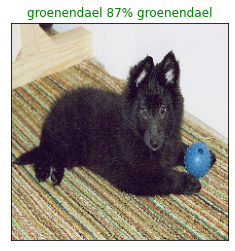

In [452]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

In [0]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n
  """

  pred_prob, true_label = prediction_probabilities[n], labels[n]

  pred_label = get_pred_label(pred_prob)

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  top_10_pred_values = pred_prob[top_10_pred_indexes]

  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="gray")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [454]:
predictions[0].argsort()

array([ 22,  18,  44,  41,  24, 118, 108,  63,  55,  47,   5, 112,  99,
       115,  21,  51, 107,  46,  33,  86,  27,  60,  92,  16,   3,  61,
         8,  82,  36,  30,  45,  49,  11, 101,  13,  43,  42,  53,   1,
        19,  39,  56,  85,  58,  15,   4, 111,  75,  12,  10,  38,  71,
        91,  37,  96,  50,  94,  54,  66,  29, 113,  25,  88, 110,  52,
       105,  84,  69,  67,  72,  87,  78,   9,  64,  80, 117,  34, 104,
        14,   7,  89,  28,  95,   2,  98, 114,   0,  40,  31,  57,  90,
        32,  23,  76,  48,  97, 116,  62,  81, 119,  68,  65,  74,  93,
        83, 106,  77,  20,  73, 100,   6, 102, 109,  79,  70,  35,  59,
        17, 103,  26])

In [455]:
predictions[0].argsort()[-10:]

array([  6, 102, 109,  79,  70,  35,  59,  17, 103,  26])

In [456]:
predictions[0].argsort()[-10:][::-1]

array([ 26, 103,  17,  59,  35,  70,  79, 109, 102,   6])

In [457]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.20865126, 0.18571717, 0.13777453, 0.11728091, 0.04445849,
       0.03906497, 0.03705516, 0.02611274, 0.02558888, 0.02308328],
      dtype=float32)

In [458]:
predictions[0].max()

0.20865126

In [459]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.20865126, 0.18571717, 0.13777453, 0.11728091, 0.04445849,
       0.03906497, 0.03705516, 0.02611274, 0.02558888, 0.02308328],
      dtype=float32)

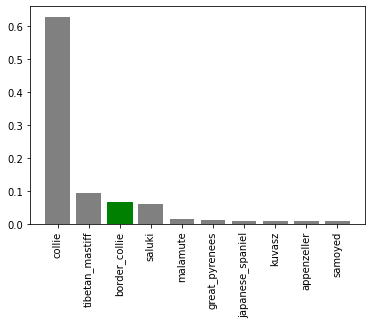

In [460]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

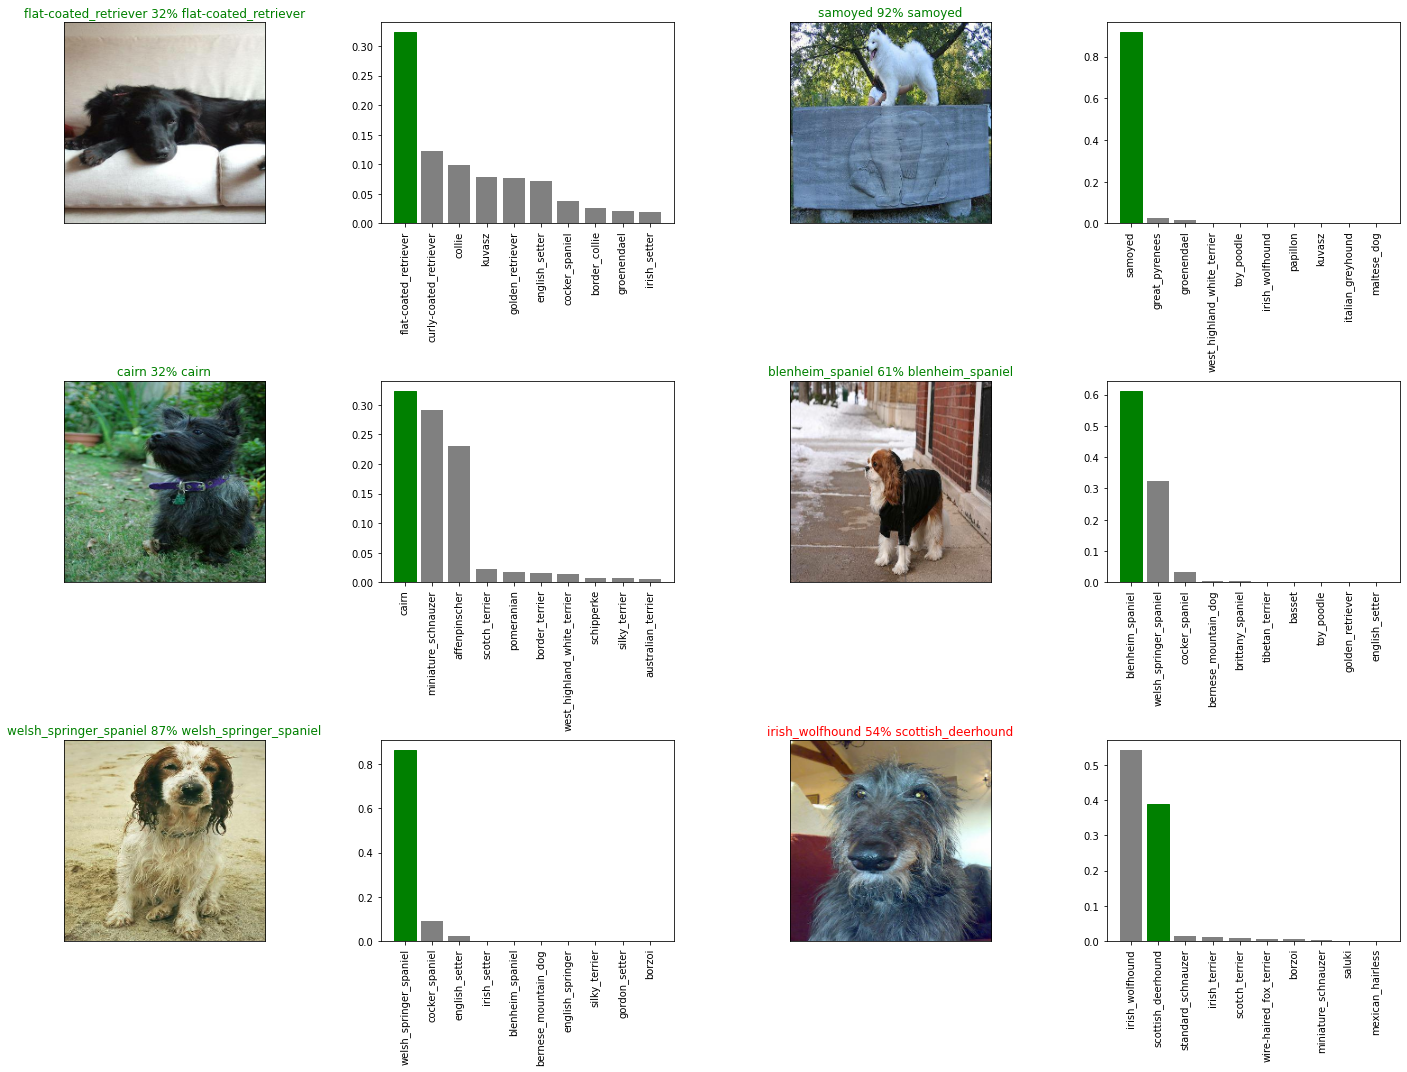

In [461]:
# start after this number until another 10 images
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)  
plt.show()

In [0]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """

  modeldir = os.path.join("drive/My Drive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" 
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [0]:
# def load_model(model_path):
#   """
#   Loads a saved model from a specified path.
#   """
#   print(f"Loading saved model from: {model_path}")
#   model = tf.keras.models.load_model(model_path,
#                                      custom_objects={"KerasLayer":hub.KerasLayer})
#   return model

In [464]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam") # Put any suffixes you want


Saving model to: drive/My Drive/Dog Vision/models/20200603-09541591178076-1000-images-Adam.h5...


'drive/My Drive/Dog Vision/models/20200603-09541591178076-1000-images-Adam.h5'

In [465]:
loaded_1000_image_model = load_model('drive/My Drive/Dog Vision/models/20200602-08321591086764-1000-images-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20200602-08321591086764-1000-images-Adam.h5


In [466]:
model.evaluate(val_data)

7/7 [==============================] - 1s 110ms/step - loss: 1.1773 - accuracy: 0.6900


[1.1772797107696533, 0.6899999976158142]

In [467]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 112ms/step - loss: 1.1773 - accuracy: 0.6900


[1.1772797107696533, 0.6899999976158142]

## Training a big dog model (on the full data)

In [468]:
len(X), len(y)

(10222, 10222)

In [469]:
X[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [470]:
len(X_train)

800

In [471]:
y[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [472]:
full_data = create_data_batches(X,y)

Creating training data batches...


In [473]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [474]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
full_model_tensorboard = create_tensorboard_callback()

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [0]:
# full_model.fit(x=full_data,
#                epochs=NUM_EPOCHS,
#                callbacks=[full_model_tensorboard,full_model_early_stopping])

In [477]:
loaded_full_model = load_model('drive/My Drive/Dog Vision/models/20200603-09431591177406-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20200603-09431591177406-full-image-set-mobilenetv2-Adam.h5


In [0]:
# save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

In [487]:
test_path = "drive/My Drive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Dog Vision/test/f3094b103a8d45b2c1026f2d5bb4c687.jpg',
 'drive/My Drive/Dog Vision/test/eb278b7573e08beb43823a006a7ba690.jpg',
 'drive/My Drive/Dog Vision/test/ef69016a79094a8bd47f42ccc14ba63a.jpg',
 'drive/My Drive/Dog Vision/test/e85291fc6ba44e39defc7769fa020646.jpg',
 'drive/My Drive/Dog Vision/test/e96fd30110107e506de94d81af346238.jpg',
 'drive/My Drive/Dog Vision/test/f3ea1d71874433a4fe775deb9e95923a.jpg',
 'drive/My Drive/Dog Vision/test/eee6679003d570e8370d1fcca75984c9.jpg',
 'drive/My Drive/Dog Vision/test/ef5f1eb55d91360df896824ac4cc979b.jpg',
 'drive/My Drive/Dog Vision/test/f446eac396b0e74af84fab5069d28c68.jpg',
 'drive/My Drive/Dog Vision/test/eb2e408930e0873deb85484ef46f07fd.jpg']

In [488]:
len(test_filenames)

10357

In [489]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [490]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [491]:
test_predictions = loaded_full_model.predict(test_data,verbose=1)

324/324 [==============================] - 4927s 15s/step


In [0]:
np.savetxt("drive/My Drive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [0]:
test_predictions = np.loadtxt("drive/My Drive/Dog Vision/preds_array.csv", delimiter=",")

In [498]:
test_predictions[:10]

array([[8.06905439e-15, 2.46590563e-13, 2.37061759e-11, ...,
        6.66498432e-13, 2.19676187e-11, 1.50382343e-12],
       [1.45706588e-06, 5.43799616e-10, 8.19290058e-09, ...,
        2.61903921e-08, 9.58133572e-10, 1.21875587e-07],
       [1.72569372e-08, 5.39690461e-07, 3.07581308e-06, ...,
        1.62804934e-08, 7.59902932e-08, 6.54257537e-10],
       ...,
       [2.90837601e-12, 2.44535590e-11, 6.73175890e-11, ...,
        2.70352324e-10, 1.17287270e-13, 3.82422399e-14],
       [5.93991949e-08, 1.68238392e-11, 3.42183532e-10, ...,
        2.89166195e-07, 1.47290689e-06, 1.35341534e-05],
       [1.40389096e-08, 7.44923428e-11, 6.79785970e-08, ...,
        1.03033422e-08, 7.63323413e-08, 2.43274741e-07]])

In [499]:
test_predictions.shape

(10357, 120)

In [501]:
list(unique_breeds)[:10]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle']

In [503]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [504]:
os.listdir(test_path)

['f3094b103a8d45b2c1026f2d5bb4c687.jpg',
 'eb278b7573e08beb43823a006a7ba690.jpg',
 'ef69016a79094a8bd47f42ccc14ba63a.jpg',
 'e85291fc6ba44e39defc7769fa020646.jpg',
 'e96fd30110107e506de94d81af346238.jpg',
 'f3ea1d71874433a4fe775deb9e95923a.jpg',
 'eee6679003d570e8370d1fcca75984c9.jpg',
 'ef5f1eb55d91360df896824ac4cc979b.jpg',
 'f446eac396b0e74af84fab5069d28c68.jpg',
 'eb2e408930e0873deb85484ef46f07fd.jpg',
 'f3d2b254424ab99c267abc3ab22ba627.jpg',
 'f4ec1eb228bb0a7084de552fa4333b43.jpg',
 'f3a0451f0d3e3507ce3e59c1f55f23ca.jpg',
 'f5787e3574a4af6a19ff825cf0c32366.jpg',
 'f11b9fe2304f6cba807ccd0bb1562377.jpg',
 'f4560b7a3045615d9fcc915b5b08de1b.jpg',
 'ec0efefd564e6632ca11b424b6dcd2d4.jpg',
 'f372b595f5e684d8c7c261d6b0166736.jpg',
 'f46c9b6ddea9aa7ff685604eec44f67a.jpg',
 'fd9a41c9a7e713e8ff5ffac23fed60e8.jpg',
 'f73ccf304d83adecec019063e20c383c.jpg',
 'fdd0bc9db54807ec3cb121827cf69061.jpg',
 'ffbcf032231bb0b025f9070d42ab7e8f.jpg',
 'f8b0bade51fd9ba4f1cbacdc593c9ea4.jpg',
 'f5bdb338a1290c

In [512]:
os.path.splitext('df8d6d05e6f83c513a4ab0077207a72a.jpg') # split extension

('df8d6d05e6f83c513a4ab0077207a72a', '.jpg')

In [0]:
test_ids = [os.path.splitext(path) for path in os.listdir(test_path)]

In [519]:
test_ids[:10]

[('f3094b103a8d45b2c1026f2d5bb4c687', '.jpg'),
 ('eb278b7573e08beb43823a006a7ba690', '.jpg'),
 ('ef69016a79094a8bd47f42ccc14ba63a', '.jpg'),
 ('e85291fc6ba44e39defc7769fa020646', '.jpg'),
 ('e96fd30110107e506de94d81af346238', '.jpg'),
 ('f3ea1d71874433a4fe775deb9e95923a', '.jpg'),
 ('eee6679003d570e8370d1fcca75984c9', '.jpg'),
 ('ef5f1eb55d91360df896824ac4cc979b', '.jpg'),
 ('f446eac396b0e74af84fab5069d28c68', '.jpg'),
 ('eb2e408930e0873deb85484ef46f07fd', '.jpg')]

In [516]:
preds_df

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [0]:
preds_df["id"] = test_ids

In [518]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,"(f3094b103a8d45b2c1026f2d5bb4c687, .jpg)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(eb278b7573e08beb43823a006a7ba690, .jpg)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"(ef69016a79094a8bd47f42ccc14ba63a, .jpg)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"(e85291fc6ba44e39defc7769fa020646, .jpg)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"(e96fd30110107e506de94d81af346238, .jpg)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [520]:
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,"(f3094b103a8d45b2c1026f2d5bb4c687, .jpg)",8.06905e-15,2.46591e-13,2.37062e-11,1.59545e-11,2.29532e-06,6.46745e-11,8.36739e-12,8.04259e-13,3.23575e-12,1.5189e-11,5.39826e-08,4.84851e-15,2.48477e-08,8.55957e-14,4.19348e-11,8.5974e-10,9.3419e-13,2.51185e-13,2.5932e-13,4.41696e-11,3.56886e-12,3.77507e-12,3.84413e-14,1.83315e-12,2.23947e-11,3.41882e-12,1.59763e-13,3.90814e-14,6.16042e-09,2.67863e-12,7.89377e-14,5.24228e-13,6.21554e-14,1.72768e-11,1.75385e-10,7.19702e-14,6.54212e-14,4.7398e-12,2.04074e-08,...,3.89855e-13,3.47626e-15,9.50488e-10,3.05607e-10,6.41956e-14,4.37514e-15,1.16416e-14,3.40251e-13,6.37145e-13,3.2252e-11,2.37456e-09,5.68258e-12,2.61222e-15,4.94515e-13,2.81907e-11,2.80104e-13,2.76456e-14,7.57436e-09,1.82597e-13,4.56901e-13,5.76638e-12,1.92438e-09,4.83636e-10,3.69558e-13,2.38836e-10,7.08595e-11,2.47651e-11,5.24928e-13,3.84299e-12,3.30097e-12,1.701e-11,3.16221e-12,9.15492e-08,1.56014e-10,0.999997,7.59567e-12,4.24653e-10,6.66498e-13,2.19676e-11,1.50382e-12
1,"(eb278b7573e08beb43823a006a7ba690, .jpg)",1.45707e-06,5.438e-10,8.1929e-09,1.23888e-08,2.38137e-09,1.54937e-09,2.75897e-11,1.25494e-08,4.57046e-10,2.15436e-07,1.24124e-09,6.69596e-09,3.6241e-08,1.28424e-09,9.5641e-09,7.52061e-09,7.5561e-08,1.75241e-07,1.59635e-09,1.56346e-06,7.36806e-08,1.87053e-07,6.286e-06,1.53721e-08,4.97259e-09,0.0019958,1.46169e-07,1.51295e-11,1.2815e-07,2.06272e-07,1.30376e-07,6.28464e-09,1.26827e-08,2.62683e-10,1.54734e-08,1.1164e-08,5.4659e-09,1.34883e-08,1.38288e-08,...,5.13193e-06,1.04241e-09,8.39961e-10,1.61544e-09,9.61829e-09,8.09149e-05,2.79236e-10,8.52801e-09,0.997801,3.3502e-08,6.15491e-10,2.03325e-07,4.29521e-08,7.81428e-09,1.61397e-10,1.16472e-08,3.38816e-09,2.80996e-09,1.49716e-08,4.15439e-10,7.02893e-05,1.27457e-07,4.75847e-07,7.09334e-08,1.81838e-07,5.40901e-10,1.58695e-07,4.34924e-07,4.54903e-09,7.20034e-08,1.42022e-08,1.42659e-08,3.57645e-08,1.31878e-09,1.29077e-07,4.86122e-10,2.66681e-09,2.61904e-08,9.58134e-10,1.21876e-07
2,"(ef69016a79094a8bd47f42ccc14ba63a, .jpg)",1.72569e-08,5.3969e-07,3.07581e-06,4.2739e-11,3.68487e-07,8.88054e-07,6.31283e-09,5.92632e-10,2.48296e-11,1.51856e-10,1.60287e-09,3.05481e-06,3.83537e-08,6.48305e-10,6.22399e-05,2.35873e-06,7.0084e-05,4.12646e-08,7.92834e-07,2.4699e-07,5.33093e-08,2.95649e-09,8.92266e-08,2.51936e-07,2.03255e-06,7.29672e-07,1.54419e-09,1.157e-07,4.21603e-07,6.8169e-07,9.1686e-07,2.45624e-06,1.47715e-06,6.82652e-06,3.1002e-07,3.57759e-06,3.447e-08,2.29455e-10,1.32455e-08,...,2.64349e-05,1.26698e-06,2.29143e-07,7.30354e-06,1.50227e-09,9.27791e-08,2.10074e-09,2.84884e-05,2.16102e-07,9.60863e-06,9.26669e-09,2.38618e-06,1.46056e-06,4.29291e-07,8.27303e-07,2.67451e-05,6.776e-11,1.46912e-06,1.59183e-13,7.51532e-07,3.16705e-08,1.74704e-08,9.96874e-10,1.90746e-10,2.39714e-05,1.32229e-06,7.95287e-09,0.00231173,0.981768,1.28787e-06,1.95644e-07,2.196e-08,1.58333e-07,2.61773e-06,1.84815e-06,6.03223

In [0]:
preds_df.to_csv("drive/My Drive/Dog Vision/full_model_predictions_submission_1_mobilenetV2.csv",index=False)